In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

import numpy as np
import pandas as pd
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-talk')
import torch
import glob
import random
import os

In [2]:
df = pd.read_csv("../input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv")
df

,BraTS21ID,MGMT_value
0,0,1
1,2,1
2,3,0
3,5,1
4,6,1
...,...,...
580,1005,1
581,1007,1
582,1008,1
583,1009,0


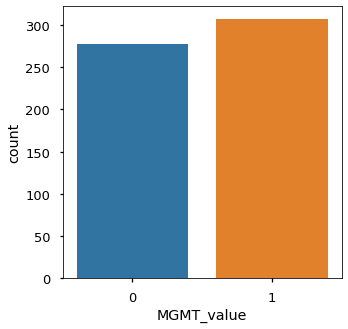

In [3]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x="MGMT_value");

In [4]:
from pathlib import Path
from collections import defaultdict
mri_types_dict = defaultdict(list)
samples = glob.glob('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/*')

for sample in samples:
    for mri_t_dir in glob.glob(f'{sample}/*'):
        mri_t = mri_t_dir.split('/')[-1]
        mri_types_dict[mri_t].append(len(glob.glob(f'{mri_t_dir}/*')))

            


In [5]:
mri_types_df = pd.DataFrame(data=np.array(list(mri_types_dict.values())).T, columns=mri_types_dict.keys())
mri_types_df.head()

,T2w,T1wCE,T1w,FLAIR
0,376,214,214,196
1,384,120,29,257
2,416,222,32,196
3,64,192,192,60
4,129,129,352,216


In [6]:
mri_types_df.describe()

,T2w,T1wCE,T1w,FLAIR
count,585.000000,585.000000,585.000000,585.000000
mean,170.940171,165.411966,132.695726,126.919658
std,156.590694,81.944620,91.717739,101.291956
min,19.000000,19.000000,19.000000,15.000000
25%,64.000000,129.000000,32.000000,60.000000
50%,64.000000,192.000000,180.000000,60.000000
75%,376.000000,192.000000,192.000000,200.000000
max,472.000000,400.000000,400.000000,514.000000


AxesSubplot(0.125,0.125;0.775x0.755)


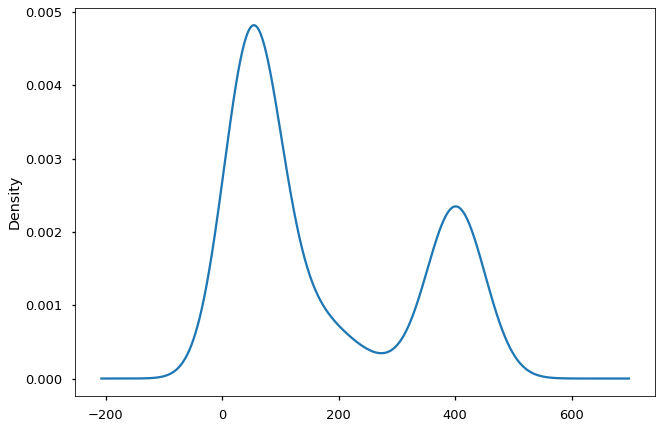

AxesSubplot(0.125,0.125;0.775x0.755)


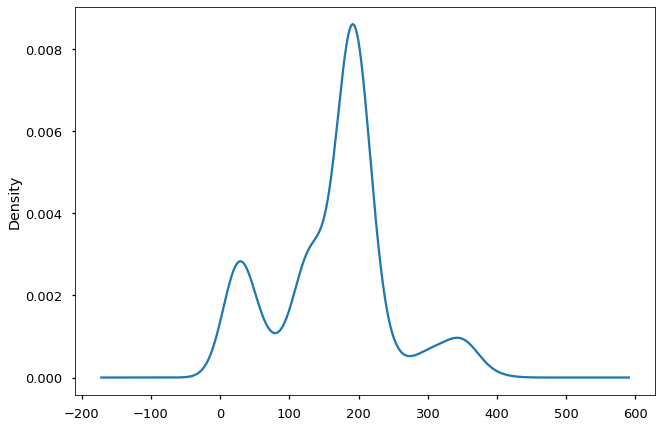

AxesSubplot(0.125,0.125;0.775x0.755)


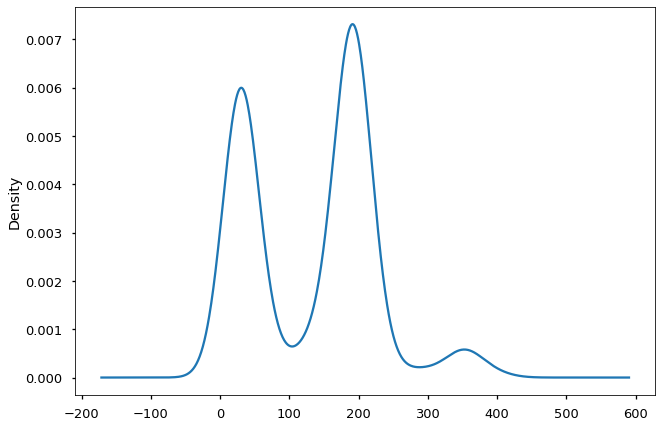

AxesSubplot(0.125,0.125;0.775x0.755)


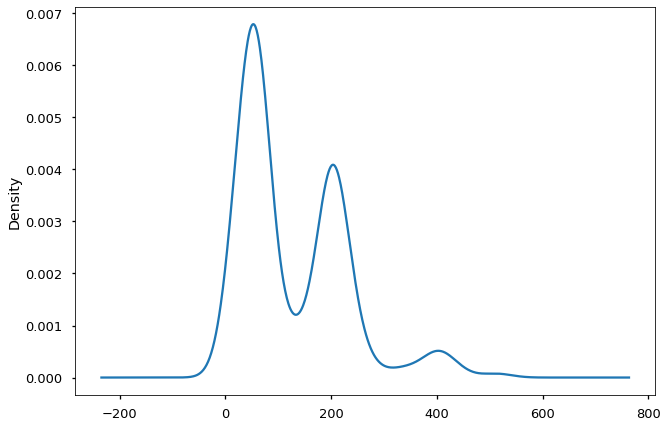

In [7]:
for mri_t in mri_types_df.columns:
    print(mri_types_df[mri_t].plot.kde())
    plt.show()

In [8]:



def visualize_sample(
    brats21id, 
    slice_i,
    mgmt_value,
    types=("FLAIR", "T1w", "T1wCE", "T2w")
):
    plt.figure(figsize=(16, 5))
    patient_path = os.path.join(
        "../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/", 
        str(brats21id).zfill(5),
    )
    for i, t in enumerate(types, 1):
        t_paths = sorted(
            glob.glob(os.path.join(patient_path, t, "*")), 
            key=lambda x: int(x[:-4].split("-")[-1]),
        )
        data = load_dicom(t_paths[int(len(t_paths) * slice_i)])
        plt.subplot(1, 4, i)
        plt.imshow(data, cmap="gray")
        plt.title(f"{t}", fontsize=16)
        plt.axis("off")

    plt.suptitle(f"MGMT_value: {mgmt_value}", fontsize=16)
    plt.show()

In [9]:
def load_dicom(path):
    dicom = pydicom.read_file(path)
    data = dicom.pixel_array
    data = data - np.min(data)
    if np.max(data) != 0:
        data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
    return data

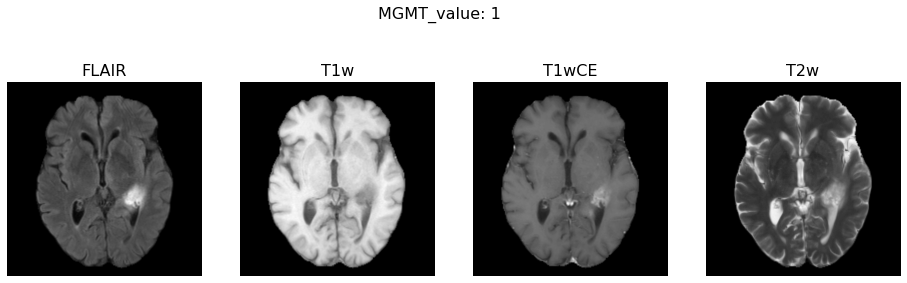

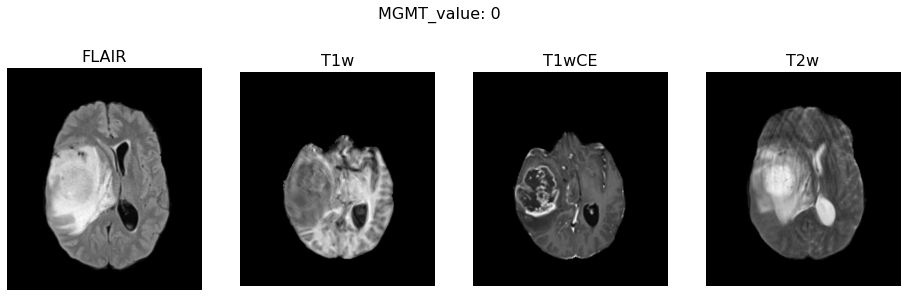

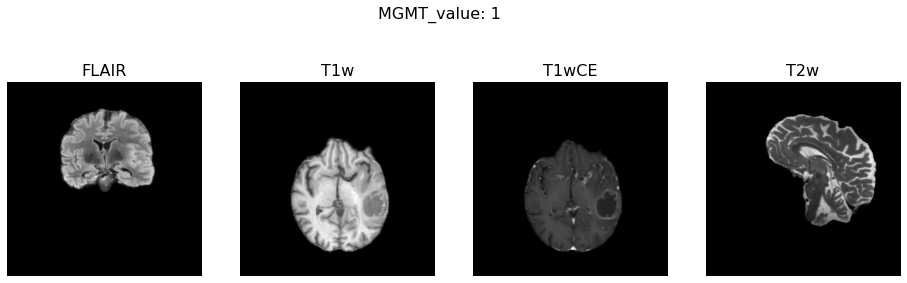

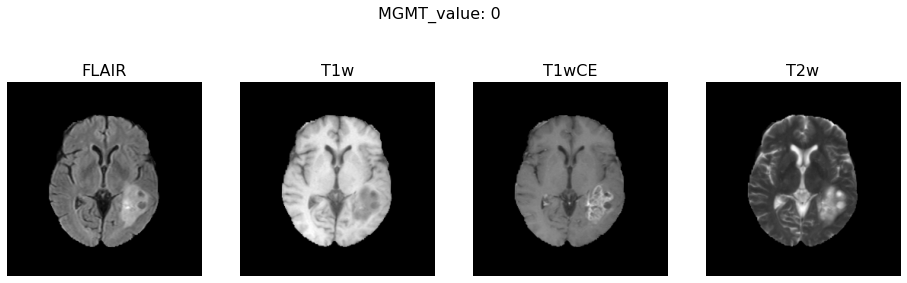

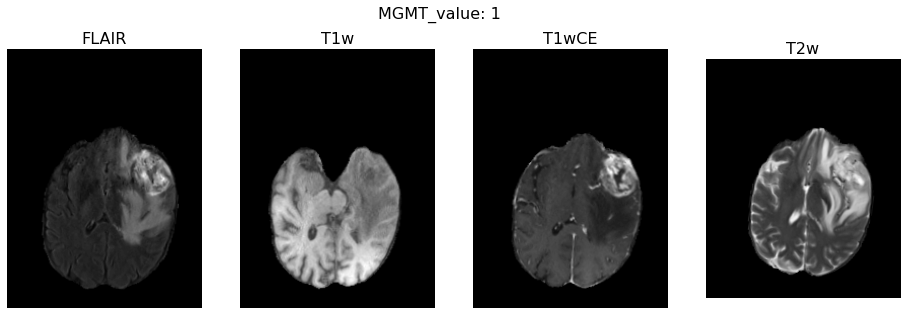

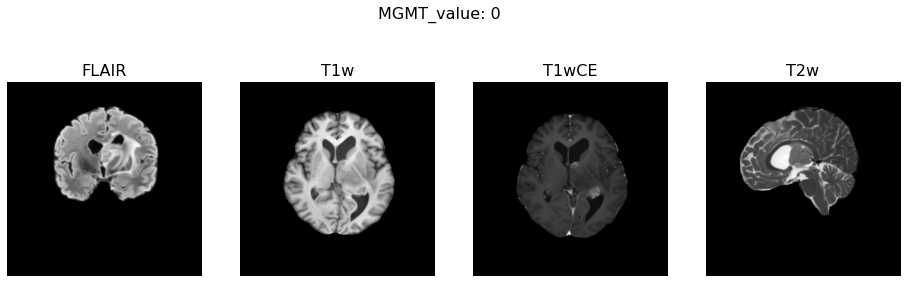

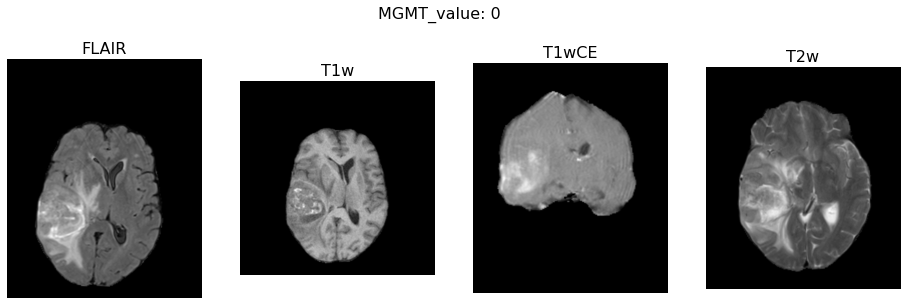

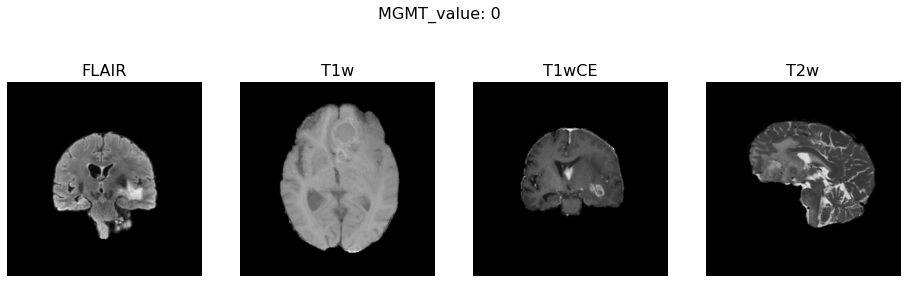

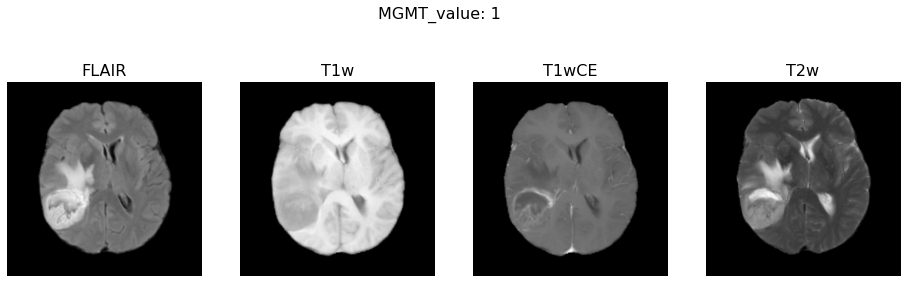

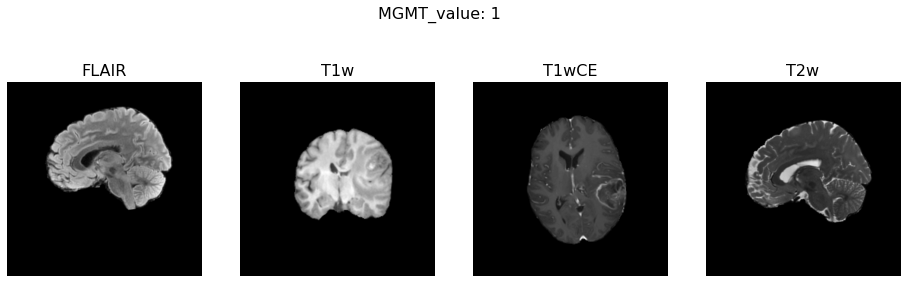

In [10]:
for i in random.sample(range(df.shape[0]), 10):
    _brats21id = df.iloc[i]["BraTS21ID"]
    _mgmt_value = df.iloc[i]["MGMT_value"]
    visualize_sample(brats21id=_brats21id, mgmt_value=_mgmt_value, slice_i=0.5)